In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

### Q.2.d) Modify your code to accommodate an arbitrary number of layers for a multilayer perceptron. Cross check your implementation by comparing with the Pytorch implementation of the same. Experiment with a few values of number of layers and comment on depth vs width of network.


In [65]:
#importing data
df = pd.read_excel("E:\ID5030\HW05\Concrete_Data.xls")
print('The shape of given data is:',df.shape)
df

The shape of given data is: (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [124]:
#obtaining target values
Y = df.iloc[:,8]
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [125]:
#obtaining feature values
X=df.iloc[:,:8]
print(f'Number of features in the given dataset is {X.shape[1]}')
X = np.array(X)

Number of features in the given dataset is 8


In [126]:
X=np.array(X)
Y=np.array(Y)

In [127]:
#splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.20,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
print(f'The shape of test data is:{x_test.shape}')


The shape of training data is:(824, 8)
The shape of test data is:(206, 8)


In [128]:
#splitting into train and validation data
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.25,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
print(f'The shape of test data is:{x_val.shape}')



The shape of training data is:(618, 8)
The shape of test data is:(206, 8)


In [129]:
'normalising data'
def normalise_data(x):
    return (x-np.mean(x,axis=0))/np.std(x,axis=0)

In [130]:
x_train=normalise_data(x_train)
x_test=normalise_data(x_test)
x_val=normalise_data(x_val)
x_train=x_train.T
x_test=x_test.T
x_val=x_val.T
y_train=y_train.reshape(y_train.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T
y_val=y_val.T
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(8, 618)
(8, 206)
(8, 206)
(1, 618)
(1, 206)
(1, 206)


In [131]:
'identity function'
def identity_function(z):
    return z

In [74]:
'derivative of identity function'
def derivative_identity_function(z):
    return 1

In [75]:
#MEAN SQUARED ERROR FUNCTION
def mean_squared_error_function(y,ycap):
    m=y.shape[1]
    mean_square_error = (1/m)*np.sum((y-ycap)**2)
    
    return mean_square_error

In [76]:
def random_initialization(layer_attributes):
    
    L=len(layer_attributes)-1
    W=[]
    B=[]
    np.random.seed(10)
    for i in range(1,L+1):
        weight_i = np.random.uniform(-1,1,(layer_attributes[i],layer_attributes[i-1]))
        bias_i=np.zeros((layer_attributes[i],1))
        W.append(weight_i)
        B.append(bias_i)
        
    return W,B
        
        

In [77]:
#FORWARD PROPOGATION
def forward_propagation(x,w,b):

    A=[]
    Z=[]
    length=len(w)
    A.append(x)
    for i in range(length):
        z_i=np.dot(w[i],A[-1])+b[i]
        Z.append(z_i)
        a_i = identity_function(z_i)
        A.append(a_i)
    return Z,A
    

In [78]:
#BACK PROPOGATION
def back_prop(A,y,W,B,Z):
    m=y.shape[1]
    L=len(W)
    dW=[]
    dB=[]
    dZ=[]
    #Output Layer
    dZ.append((A[-1]-y))
    dB.append((1/m)*np.sum(dZ[-1],axis=1,keepdims=True))
    dW.append((1/m)*(np.dot(dZ[-1],A[-2].T)))
   
    #Hidden layers
    l=L-1
    while l >0:
        dz_l = (1/m)*np.dot(W[l].T,dZ[-1])*derivative_identity_function(A[l])
        db_l = (1/m)*np.sum(dz_l,axis=1,keepdims=True)
        dw_l = (1/m)*np.dot(dz_l,A[l-1].T)
        dW.append(dw_l)
        dB.append(db_l)
        dZ.append(dz_l)
        l=l-1
            
    return dZ[::-1],dW[::-1],dB[::-1]

In [79]:
def gradient_descent(W,B,dW,dB,learning_rate):
    
    alpha=learning_rate
    length=len(W)
    for i in range(length):
        W[i] = W[i] - alpha*dW[i]
        B[i] = B[i] - alpha*dB[i]
    return W,B

In [80]:
#FUNCTION FOR PLOTS
def plot_error(j_train, j_val):
    plt.plot(list(range(len(j_train))), j_train, 'r', label="Train Loss")
    plt.plot(list(range(len(j_val))), j_val, 'lime', label="Validation Loss")
    plt.title("Training and Validation Loss vs No. of Epochs", size=16)
    plt.xlabel("No. of epochs", size=16)
    plt.ylabel("Loss", size=16)
    plt.legend()
    plt.grid()
    plt.show()

In [83]:
def neural_network(x_train,y_train,x_val,y_val,learning_rate = 0.01,epochs = 2000,num_hidden_layers = 1,neurons=2):

    layer=[]
    n,m=x_train.shape
    J_train=[]
    J_val=[]
    R2_train=[]
    R2_val=[]
    layer.append(x_train.shape[0])
    for i in range(num_hidden_layers):
        layer.append(neurons)
    layer.append(y_train.shape[0])
    print(f'neuron configuration: {layer}')
    w,b=random_initialization(layer)
    for j in range(epochs):
        z,a = forward_propagation(x_train,w,b)
        dz,dw,db=back_prop(a,y_train,w,b,z)
        w,b=gradient_descent(w,b,dw,db,learning_rate)
        cost_train=mean_squared_error_function(y_train,a[-1])
        r2_score_train=r2_score(y_train.T,a[-1].T)
        R2_train.append(r2_score_train)
        J_train.append(cost_train)
        z_val,a_val = forward_propagation(x_val,w,b)
        cost_val = mean_squared_error_function(y_val,a_val[-1])
        r2_score_val=r2_score(y_val.T,a_val[-1].T)
        R2_val.append(r2_score_val)
        J_val.append(cost_val)
        if j%(epochs/10)==0:
            print(f' \n epoch:{j:4d}  Train error:  {J_train[-1]:8.2f} R2_score train: {R2_train[-1]:.2f} Val error: {J_val[-1]:8.2f}  R2_validation: {R2_val[-1]:.2f}')
            
    plot_error(J_train,J_val)
    return w,b      

neuron configuration: [8, 3, 1]
 
 epoch:   0  Train error:   1527.38 R2_score train: -4.40 Val error:  1234.44  R2_validation: -3.38
 
 epoch: 200  Train error:    114.52 R2_score train: 0.59 Val error:   118.04  R2_validation: 0.58
 
 epoch: 400  Train error:    109.85 R2_score train: 0.61 Val error:   112.00  R2_validation: 0.60
 
 epoch: 600  Train error:    107.91 R2_score train: 0.62 Val error:   109.43  R2_validation: 0.61
 
 epoch: 800  Train error:    106.69 R2_score train: 0.62 Val error:   107.91  R2_validation: 0.62
 
 epoch:1000  Train error:    105.83 R2_score train: 0.63 Val error:   106.95  R2_validation: 0.62
 
 epoch:1200  Train error:    105.17 R2_score train: 0.63 Val error:   106.33  R2_validation: 0.62
 
 epoch:1400  Train error:    104.63 R2_score train: 0.63 Val error:   105.91  R2_validation: 0.62
 
 epoch:1600  Train error:    104.17 R2_score train: 0.63 Val error:   105.63  R2_validation: 0.63
 
 epoch:1800  Train error:    103.77 R2_score train: 0.63 Val err

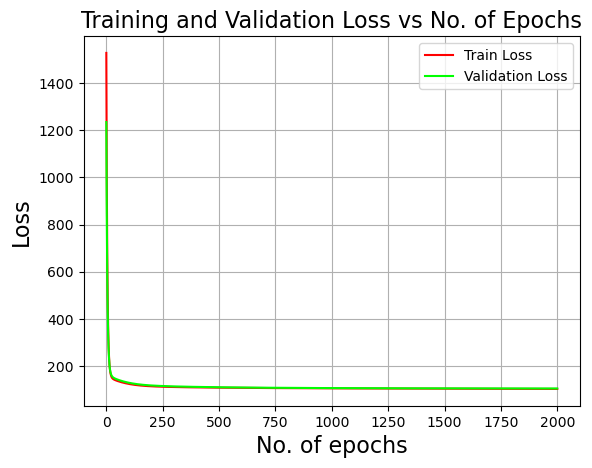

In [95]:
w,b=neural_network(x_train,y_train,x_val,y_val,neurons=3,epochs=2000,num_hidden_layers=1,learning_rate=0.1)

neuron configuration: [8, 8, 1]
 
 epoch:   0  Train error:   1578.65 R2_score train: -4.59 Val error:  1213.42  R2_validation: -3.30
 
 epoch: 100  Train error:    113.23 R2_score train: 0.60 Val error:   116.76  R2_validation: 0.59
 
 epoch: 200  Train error:    106.85 R2_score train: 0.62 Val error:   109.61  R2_validation: 0.61
 
 epoch: 300  Train error:    103.37 R2_score train: 0.63 Val error:   106.15  R2_validation: 0.62
 
 epoch: 400  Train error:    102.33 R2_score train: 0.64 Val error:   105.65  R2_validation: 0.63
 
 epoch: 500  Train error:    102.10 R2_score train: 0.64 Val error:   105.87  R2_validation: 0.62
 
 epoch: 600  Train error:    102.05 R2_score train: 0.64 Val error:   106.08  R2_validation: 0.62
 
 epoch: 700  Train error:    102.04 R2_score train: 0.64 Val error:   106.20  R2_validation: 0.62
 
 epoch: 800  Train error:    102.04 R2_score train: 0.64 Val error:   106.26  R2_validation: 0.62
 
 epoch: 900  Train error:    102.04 R2_score train: 0.64 Val err

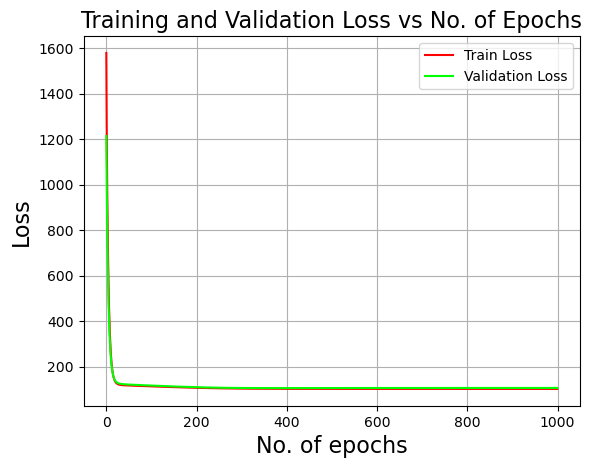

In [97]:
w,b=neural_network(x_train,y_train,x_val,y_val,neurons=8,epochs=1000,num_hidden_layers=1,learning_rate=0.1)

neuron configuration: [8, 16, 1]
 
 epoch:   0  Train error:   1502.15 R2_score train: -4.32 Val error:  1169.32  R2_validation: -3.15
 
 epoch: 100  Train error:    102.55 R2_score train: 0.64 Val error:   105.29  R2_validation: 0.63
 
 epoch: 200  Train error:    102.07 R2_score train: 0.64 Val error:   105.96  R2_validation: 0.62
 
 epoch: 300  Train error:    102.04 R2_score train: 0.64 Val error:   106.23  R2_validation: 0.62
 
 epoch: 400  Train error:    102.04 R2_score train: 0.64 Val error:   106.30  R2_validation: 0.62
 
 epoch: 500  Train error:    102.04 R2_score train: 0.64 Val error:   106.31  R2_validation: 0.62
 
 epoch: 600  Train error:    102.04 R2_score train: 0.64 Val error:   106.32  R2_validation: 0.62
 
 epoch: 700  Train error:    102.04 R2_score train: 0.64 Val error:   106.32  R2_validation: 0.62
 
 epoch: 800  Train error:    102.04 R2_score train: 0.64 Val error:   106.32  R2_validation: 0.62
 
 epoch: 900  Train error:    102.04 R2_score train: 0.64 Val er

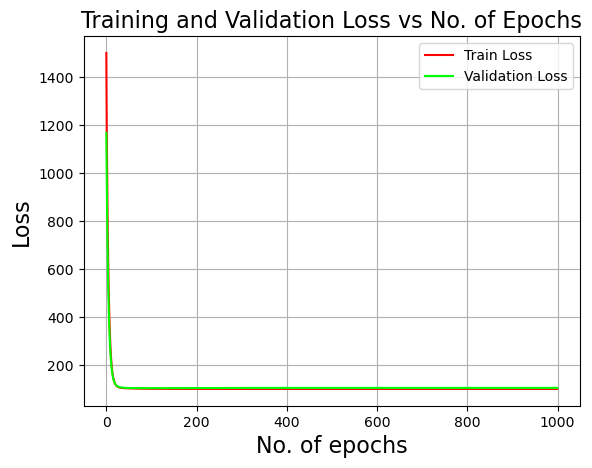

In [99]:
w,b=neural_network(x_train,y_train,x_val,y_val,neurons=16,epochs=1000,num_hidden_layers=1,learning_rate=0.1)

neuron configuration: [8, 64, 1]
 
 epoch:   0  Train error:   1624.72 R2_score train: -4.75 Val error:  1475.22  R2_validation: -4.23
 
 epoch: 100  Train error:    246.06 R2_score train: 0.13 Val error:   249.32  R2_validation: 0.12
 
 epoch: 200  Train error:    115.79 R2_score train: 0.59 Val error:   119.84  R2_validation: 0.58
 
 epoch: 300  Train error:    103.24 R2_score train: 0.63 Val error:   107.19  R2_validation: 0.62
 
 epoch: 400  Train error:    102.16 R2_score train: 0.64 Val error:   106.15  R2_validation: 0.62
 
 epoch: 500  Train error:    102.05 R2_score train: 0.64 Val error:   106.13  R2_validation: 0.62
 
 epoch: 600  Train error:    102.04 R2_score train: 0.64 Val error:   106.19  R2_validation: 0.62
 
 epoch: 700  Train error:    102.04 R2_score train: 0.64 Val error:   106.24  R2_validation: 0.62
 
 epoch: 800  Train error:    102.04 R2_score train: 0.64 Val error:   106.27  R2_validation: 0.62
 
 epoch: 900  Train error:    102.04 R2_score train: 0.64 Val er

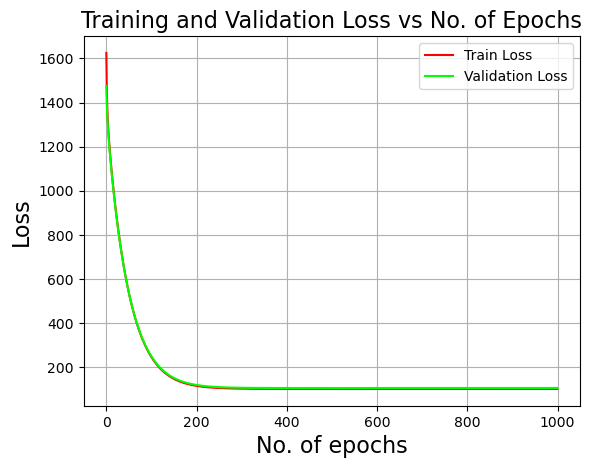

In [103]:
w,b=neural_network(x_train,y_train,x_val,y_val,neurons=64,epochs=1000,num_hidden_layers=1,learning_rate=0.01)

In [104]:
'''TEST DATA'''
z,a=forward_propagation(x_test,w,b)
cost_test=mean_squared_error_function(y_test,a[-1])
print(f'The mean square error of test data is:{cost_test}')
print(y_test.shape)
r2_test=r2_score(y_test.T,a[-1].T)
print(f'R2-score of test data is :{r2_test:.3f}')

The mean square error of test data is:127.50663184927963
(1, 206)
R2-score of test data is :0.511


neuron configuration: [8, 16, 16, 1]
 
 epoch:   0  Train error:   1520.88 R2_score train: -4.38 Val error:  1455.14  R2_validation: -4.16
 
 epoch:  50  Train error:    552.11 R2_score train: -0.95 Val error:   550.71  R2_validation: -0.95
 
 epoch: 100  Train error:    258.11 R2_score train: 0.09 Val error:   260.91  R2_validation: 0.08
 
 epoch: 150  Train error:    155.87 R2_score train: 0.45 Val error:   159.19  R2_validation: 0.44
 
 epoch: 200  Train error:    120.92 R2_score train: 0.57 Val error:   123.97  R2_validation: 0.56
 
 epoch: 250  Train error:    109.06 R2_score train: 0.61 Val error:   111.81  R2_validation: 0.60
 
 epoch: 300  Train error:    104.99 R2_score train: 0.63 Val error:   107.58  R2_validation: 0.62
 
 epoch: 350  Train error:    103.54 R2_score train: 0.63 Val error:   106.09  R2_validation: 0.62
 
 epoch: 400  Train error:    102.98 R2_score train: 0.64 Val error:   105.56  R2_validation: 0.63
 
 epoch: 450  Train error:    102.72 R2_score train: 0.64 

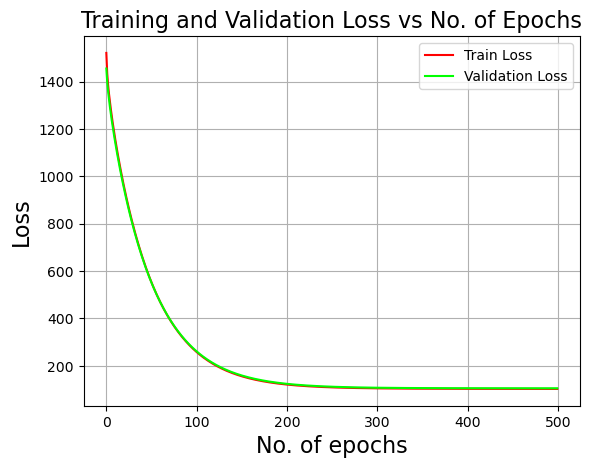

In [107]:
w,b=neural_network(x_train,y_train,x_val,y_val,neurons=16,epochs=500,num_hidden_layers=2,learning_rate=0.01)

In [108]:
'''TEST DATA'''
z,a=forward_propagation(x_test,w,b)
cost_test=mean_squared_error_function(y_test,a[-1])
print(f'The mean square error of test data is:{cost_test}')
print(y_test.shape)
r2_test=r2_score(y_test.T,a[-1].T)
print(f'R2-score of test data is :{r2_test:.3f}')

The mean square error of test data is:127.12516739024463
(1, 206)
R2-score of test data is :0.512


neuron configuration: [8, 8, 8, 8, 1]
 
 epoch:   0  Train error:   1479.19 R2_score train: -4.23 Val error:  1495.53  R2_validation: -4.30
 
 epoch:5000  Train error:    124.37 R2_score train: 0.56 Val error:   130.09  R2_validation: 0.54
 
 epoch:10000  Train error:    123.42 R2_score train: 0.56 Val error:   128.54  R2_validation: 0.54
 
 epoch:15000  Train error:    122.63 R2_score train: 0.57 Val error:   127.25  R2_validation: 0.55
 
 epoch:20000  Train error:    121.96 R2_score train: 0.57 Val error:   126.07  R2_validation: 0.55
 
 epoch:25000  Train error:    121.40 R2_score train: 0.57 Val error:   125.03  R2_validation: 0.56
 
 epoch:30000  Train error:    120.97 R2_score train: 0.57 Val error:   124.15  R2_validation: 0.56
 
 epoch:35000  Train error:    120.65 R2_score train: 0.57 Val error:   123.44  R2_validation: 0.56
 
 epoch:40000  Train error:    120.43 R2_score train: 0.57 Val error:   122.90  R2_validation: 0.56
 
 epoch:45000  Train error:    120.28 R2_score train

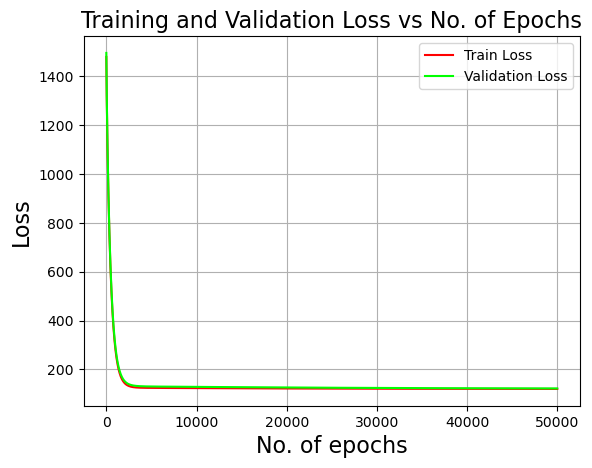

In [132]:
w,b=neural_network(x_train,y_train,x_val,y_val,neurons=8,epochs=50000,num_hidden_layers=3,learning_rate=0.001)

In [133]:
'''TEST DATA'''
z,a=forward_propagation(x_test,w,b)
cost_test=mean_squared_error_function(y_test,a[-1])
print(f'The mean square error of test data is:{cost_test}')
print(y_test.shape)
r2_test=r2_score(y_test.T,a[-1].T)
print(f'R2-score of test data is :{r2_test:.3f}')

The mean square error of test data is:136.41752184964724
(1, 206)
R2-score of test data is :0.477


In [23]:
'''PYTORCH IMPLEMENTATION'''

'PYTORCH IMPLEMENTATION'

In [137]:
#splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.20,random_state=1)
print(f'The shape of test data is:{x_test.shape}')
#splitting into train and validation data
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.25,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
print(f'The shape of validation data is:{x_val.shape}')

The shape of test data is:(206, 8)
The shape of training data is:(618, 8)
The shape of validation data is:(206, 8)


In [138]:
x_train=normalise_data(x_train)
x_test=normalise_data(x_test)
x_val=normalise_data(x_val)
y_train=y_train.reshape(y_train.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(618, 8)
(206, 8)
(206, 8)
(618, 1)
(206, 1)
(206, 1)


In [139]:
x_train=torch.tensor(x_train,dtype=torch.float32)
x_test=torch.tensor(x_test,dtype=torch.float32)
x_val=torch.tensor(x_val,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32)
y_val=torch.tensor(y_val,dtype=torch.float32)

In [140]:
print(type(x_train))
print(x_train.shape)

<class 'torch.Tensor'>
torch.Size([618, 8])


In [141]:
 def forward(x,layers):
        a=[]
        a.append(x)
        for i in range(len(layers)):
            z = layers[i](a[-1])
            a.append(z)
        
        return a[-1]

In [142]:
def R2_score(y,ypred):
    y = y.detach().numpy()
    ypred = ypred.detach().numpy()

    r2 = r2_score(y, ypred)
    return r2

In [143]:
def NN_model(x_train,y_train,x_val,y_val,learning_rate,hidden_size,num_epochs,num_hidden_layers):
    input_size=x_train.shape[1]
    output_size=1
    layers=nn.ModuleList()
    layers.append(nn.Linear(input_size,hidden_size,dtype=torch.float32))
    for i in range(num_hidden_layers-1):
        layers.append(nn.Linear(hidden_size,hidden_size,dtype=torch.float32))
    layers.append(nn.Linear(hidden_size,output_size,dtype=torch.float32))
    print(layers)
    model=nn.Sequential(layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    J_train=[]
    J_val=[]
    R2_train=[]
    R2_val=[]
    for epoch in range(num_epochs):
        ypred = forward(x_train,layers)
        loss = criterion(ypred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ypred_val=forward(x_val,layers)
        loss_val=criterion(ypred_val,y_val)
        J_train.append(loss.item())
        J_val.append(loss_val.item())
        r2_score_train=R2_score(y_train,ypred)
        R2_train.append(r2_score_train)
        r2_score_val=R2_score(y_val,ypred_val)
        R2_val.append(r2_score_val)
        if (epoch+1)%(num_epochs/10)==0:
            print('Epoch [{}/{}], Train Loss: {:.2f}  Validation Loss:{:.2f}'.format(epoch+1, num_epochs, loss.item(),loss_val.item()))
            print('R2-Score-Train : {:.2f}  R2-Score-validation:{:.2f}'.format(R2_train[-1],R2_val[-1]))
    print(ypred.shape)
    plt.plot(J_train,label='Train cost')
    plt.plot(J_val,label='Validation cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    return model.parameters(),layers

ModuleList(
  (0): Linear(in_features=8, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=1, bias=True)
)
Epoch [100/1000], Train Loss: 1112.66  Validation Loss:1115.55
R2-Score-Train : -2.94  R2-Score-validation:-2.95
Epoch [200/1000], Train Loss: 529.56  Validation Loss:527.72
R2-Score-Train : -0.87  R2-Score-validation:-0.87
Epoch [300/1000], Train Loss: 183.26  Validation Loss:183.43
R2-Score-Train : 0.35  R2-Score-validation:0.35
Epoch [400/1000], Train Loss: 119.19  Validation Loss:120.51
R2-Score-Train : 0.58  R2-Score-validation:0.57
Epoch [500/1000], Train Loss: 111.68  Validation Loss:113.14
R2-Score-Train : 0.60  R2-Score-validation:0.60
Epoch [600/1000], Train Loss: 109.98  Validation Loss:111.43
R2-Score-Train : 0.61  R2-Score-validation:0.61
Epoch [700/1000], Train Loss: 109.10  Validation Loss:110.47
R2-Score-Train : 0.61  R2-Score-validation:0.61
Epoch [800/1000], Train Loss: 108.46  Validation Loss:109.74
R2-Score-Train : 0.62  R2-Score-validati

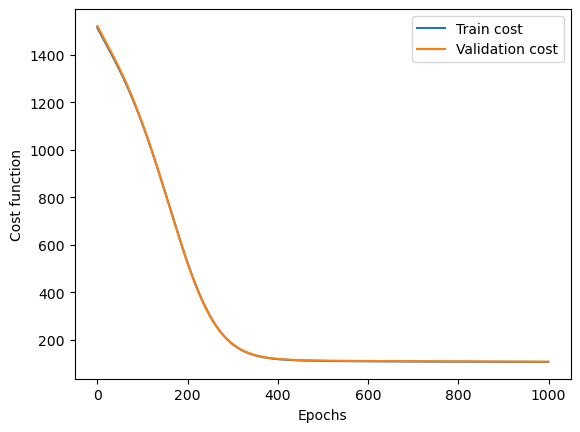

In [146]:
para,layers=NN_model(x_train,y_train,x_val,y_val,learning_rate=0.0001,hidden_size=128,num_epochs=1000,num_hidden_layers=1)

In [120]:
ypred_test=forward(x_test,layers)
loss_test=mean_squared_error(y_test.detach().numpy(),ypred_test.detach().numpy())
print(f' Loss of Test data :{loss_test:.2f}')
r2_test=r2_score(y_test.detach().numpy(),ypred_test.detach().numpy())
print(f'R2-score of test data is :{r2_test:.3f}')

 Loss of Test data :127.15
R2-score of test data is :0.512


### INFERENCES
The neural network has been implemented for arbitrary number of layers both from scratch and using PyTorch.  
The results obtained were comparable in both cases, which denotes the correctness of the models.
Also, the neural network has been implemented for different number of layers and different number of neurons in each layer.  
In case of implementation from scratch, it was found that for a fixed number of iterations, as the depth increases, the r2-score increased initially and then were high. This is because of overfitting of the model. As width increases, it was found that mean-squared-error decreased initially and then appeared to be constant.

Generally speaking, a deeper neural network may be better suited for a regression problem when the input features are highly nonlinear and there are complex interactions between them. This is because a deeper network can learn more complex functions that capture these interactions. However, deep neural networks can also be prone to overfitting, especially if the training data is limited.

On the other hand, a wider neural network may be more appropriate for regression problems with large amounts of data, where the goal is to capture a wider range of feature interactions. A wider network can potentially learn more complex functions with fewer layers, but this may come at the cost of increased computational requirements.
